<a href="https://colab.research.google.com/github/Devaki01/ACM-Responsible-AI/blob/main/Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx

edges = [(1, 2), (2, 3), (3, 4), (2, 4), (4, 5)]

G = nx.Graph()
G.add_edges_from(edges)

print(f"Nodes: {G.nodes()}")
print(f"Edges: {G.edges()}")


Nodes: [1, 2, 3, 4, 5]
Edges: [(1, 2), (2, 3), (2, 4), (3, 4), (4, 5)]


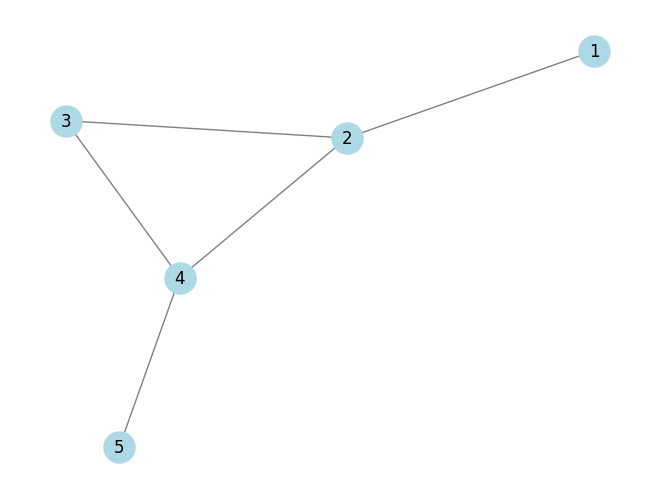

In [ ]:
import matplotlib.pyplot as plt

pos = nx.kamada_kawai_layout(G)

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=500,
    node_color='lightblue',
    font_size=12,
    edge_color='gray'
)

plt.axis('off')
plt.show()

In [ ]:
nx.degree_centrality(G)

{1: 0.25, 2: 0.75, 3: 0.5, 4: 0.75, 5: 0.25}

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.1 MB/s eta 0:00:00


In [ ]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()

print("Number of graphs:", len(dataset))
print("Number of classes:", dataset.num_classes)
print("Number of node features:", dataset.num_node_features)

Number of graphs: 1
Number of classes: 4
Number of node features: 34


In [ ]:
data = dataset[0]
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [ ]:
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

G = to_networkx(data, to_undirected=True)

In [ ]:
data.y

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

In [ ]:
data.train_mask

tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])

In [ ]:
train_nodes = data.train_mask.nonzero(as_tuple=True)[0]
print(train_nodes)

tensor([ 0,  4,  8, 24])


In [ ]:
import torch

data.train_mask = torch.ones(data.num_nodes, dtype=torch.bool)
data.train_mask

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True])

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(34, 16)
        self.conv2 = GCNConv(16, 4)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

model = GCN()
print(model)


GCN(
  (conv1): GCNConv(34, 16)
  (conv2): GCNConv(16, 4)
)


In [ ]:
import torch
import torch.nn.functional as F
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()
@torch.no_grad()
def test():
    model.eval()
    out = model(data)
    pred = out.argmax(dim=1)

    acc = (pred[data.train_mask] == data.y[data.train_mask]).float().mean()
    return acc.item()

loss_history = []
acc_history = []
for epoch in range(1, 201):
    loss = train()
    loss_history.append(loss)
    acc = test()
    acc_history.append(acc)
    if epoch % 10 == 0:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {acc:.4f}')

Epoch: 010, Loss: 1.1844, Train Acc: 0.7059
Epoch: 020, Loss: 0.9710, Train Acc: 0.7059
Epoch: 030, Loss: 0.7335, Train Acc: 0.7941
Epoch: 040, Loss: 0.5579, Train Acc: 0.9118
Epoch: 050, Loss: 0.3631, Train Acc: 0.9412
Epoch: 060, Loss: 0.2561, Train Acc: 0.9706
Epoch: 070, Loss: 0.2490, Train Acc: 1.0000
Epoch: 080, Loss: 0.1513, Train Acc: 0.9706
Epoch: 090, Loss: 0.2211, Train Acc: 1.0000
Epoch: 100, Loss: 0.2394, Train Acc: 1.0000
Epoch: 110, Loss: 0.1711, Train Acc: 1.0000
Epoch: 120, Loss: 0.1665, Train Acc: 1.0000
Epoch: 130, Loss: 0.1123, Train Acc: 1.0000
Epoch: 140, Loss: 0.1504, Train Acc: 1.0000
Epoch: 150, Loss: 0.1611, Train Acc: 1.0000
Epoch: 160, Loss: 0.0720, Train Acc: 1.0000
Epoch: 170, Loss: 0.1085, Train Acc: 1.0000
Epoch: 180, Loss: 0.0399, Train Acc: 1.0000
Epoch: 190, Loss: 0.0559, Train Acc: 1.0000
Epoch: 200, Loss: 0.0794, Train Acc: 1.0000


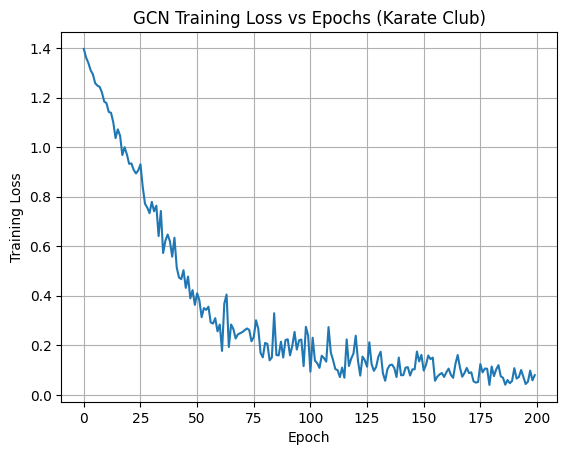

In [26]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('GCN Training Loss vs Epochs (Karate Club)')
plt.grid(True)
plt.show()

In [28]:
import torch
import networkx as nx

dc = nx.degree_centrality(G)
bwc = nx.betweenness_centrality(G)

nodes = sorted(G.nodes())
dc_t = torch.tensor([dc[n] for n in nodes], dtype=torch.float).view(-1, 1)
bwc_t = torch.tensor([bwc[n] for n in nodes], dtype=torch.float).view(-1, 1)

data.x = torch.cat([dc_t, bwc_t], dim=1)

print("New feature shape:", data.x.shape)
data.x

New feature shape: torch.Size([34, 2])


tensor([[0.4848, 0.4376],
        [0.2727, 0.0539],
        [0.3030, 0.1437],
        [0.1818, 0.0119],
        [0.0909, 0.0006],
        [0.1212, 0.0300],
        [0.1212, 0.0300],
        [0.1212, 0.0000],
        [0.1515, 0.0559],
        [0.0606, 0.0008],
        [0.0909, 0.0006],
        [0.0303, 0.0000],
        [0.0606, 0.0000],
        [0.1515, 0.0459],
        [0.0606, 0.0000],
        [0.0606, 0.0000],
        [0.0606, 0.0000],
        [0.0606, 0.0000],
        [0.0606, 0.0000],
        [0.0909, 0.0325],
        [0.0606, 0.0000],
        [0.0606, 0.0000],
        [0.0606, 0.0000],
        [0.1515, 0.0176],
        [0.0909, 0.0022],
        [0.0909, 0.0038],
        [0.0606, 0.0000],
        [0.1212, 0.0223],
        [0.0909, 0.0018],
        [0.1212, 0.0029],
        [0.1212, 0.0144],
        [0.1818, 0.1383],
        [0.3636, 0.1452],
        [0.5152, 0.3041]])

In [29]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='data/Cora', name='Cora')


Processing...
Done!
